In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

import matplotlib
matplotlib.style.use('ggplot')


%pylab inline

Populating the interactive namespace from numpy and matplotlib


User Inputs
---

In [13]:
path = 'C:\Users\SSpielman\Documents\Jupyter\SQL Queries'
filename = 'in.sql'

Database Connection
---

In [14]:
con = sqlite3.connect(os.path.join(path, filename))

SQL Tables
---

In [11]:
df = pd.read_sql_query("SELECT ZoneInfoZoneLists.ZoneListIndex, ZoneLists.Name, Zones.ZoneName, Zones.FloorArea From ZoneInfoZoneLists INNER JOIN ZoneLists ON ZoneInfoZoneLists.ZoneListIndex = ZoneLists.ZoneListIndex INNER JOIN Zones On ZoneInfoZoneLists.ZoneIndex = Zones.ZoneIndex ORDER BY ZoneInfoZoneLists.ZoneListIndex ASC;", con)
print df

     ZoneListIndex   Name                       ZoneName   FloorArea
0                1    AUD         THERMAL ZONE: LA-AUD-1  172.809984
1                2  BREAK       THERMAL ZONE: L2-BREAK-1  202.885629
2                2  BREAK       THERMAL ZONE: L2-BREAK-2  186.059628
3                2  BREAK       THERMAL ZONE: L3-BREAK-1  186.059628
4                2  BREAK       THERMAL ZONE: L3-BREAK-2  208.654421
5                2  BREAK       THERMAL ZONE: L4-BREAK-1  186.059628
6                2  BREAK       THERMAL ZONE: L4-BREAK-2  208.654421
7                2  BREAK       THERMAL ZONE: L5-BREAK-1  186.059628
8                2  BREAK       THERMAL ZONE: L5-BREAK-2  208.654421
9                2  BREAK       THERMAL ZONE: L6-BREAK-1  186.059628
10               2  BREAK     THERMAL ZONE: L6-BREAK-1 1  208.654421
11               2  BREAK       THERMAL ZONE: L7-BREAK-1  186.059628
12               2  BREAK       THERMAL ZONE: L7-BREAK-2  208.654421
13               2  BREAK       TH

In [10]:
df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", con)
print df

                        name
0                Simulations
1         EnvironmentPeriods
2                     Errors
3                       Time
4                      Zones
5                  ZoneLists
6                 ZoneGroups
7          ZoneInfoZoneLists
8                  Schedules
9                  Materials
10             Constructions
11        ConstructionLayers
12                  Surfaces
13      ReportDataDictionary
14                ReportData
15        ReportExtendedData
16             NominalPeople
17           NominalLighting
18  NominalElectricEquipment
19       NominalGasEquipment
20     NominalSteamEquipment
21  NominalHotWaterEquipment
22     NominalOtherEquipment
23   NominalBaseboardHeaters
24       NominalInfiltration
25        NominalVentilation
26                 ZoneSizes
27               SystemSizes
28            ComponentSizes
29             RoomAirModels
30              DaylightMaps
31  DaylightMapHourlyReports
32     DaylightMapHourlyData
33            

Database Headers
---

In [49]:
df = pd.read_sql_query('SELECT * FROM TabularDataWithStrings LIMIT 1', con)
print df

          Value                               ReportName  ReportForString  \
0       1388.65  AnnualBuildingUtilityPerformanceSummary  Entire Facility   

                TableName            RowName    ColumnName Units  RowId  
0  Site and Source Energy  Total Site Energy  Total Energy    GJ      0  


ReportNames
---

In [50]:
df = pd.read_sql_query('SELECT ReportName FROM TabularDataWithStrings', con)
print df['ReportName'].unique()

[u'AnnualBuildingUtilityPerformanceSummary'
 u'InputVerificationandResultsSummary' u'DemandEndUseComponentsSummary'
 u'SourceEnergyEndUseComponentsSummary' u'ClimaticDataSummary'
 u'EnvelopeSummary' u'ShadingSummary' u'LightingSummary'
 u'EquipmentSummary' u'HVACSizingSummary' u'SystemSummary'
 u'OutdoorAirSummary' u'ObjectCountSummary' u'EnergyMeters'
 u'SensibleHeatGainSummary' u'Standard62.1Summary' u'LEEDsummary'
 u'ComponentSizingSummary' u'SurfaceShadowingSummary'
 u'ZoneComponentLoadSummary' u'Life-Cycle Cost Report']


Building
===

In [51]:
report_name = 'AnnualBuildingUtilityPerformanceSummary'
#report_for_string = 'Entire Facility'
table_name = 'Building Area'
column_name = 'Area'
row_name = 'Total Building Area'

sql_query = 'select Value from TabularDataWithStrings WHERE ReportName=\'' + report_name + '\''
#sql_query += ' and ReportForString=\'' + report_for_string + '\''
sql_query += ' and TableName=\'' + table_name + '\''
sql_query += ' and ColumnName=\'' + column_name + '\''
sql_query += ' and RowName=\'' + row_name + '\''
sql_query += ';'

df = pd.read_sql_query(sql_query, con)
floor_area = float(df.iloc[0]['Value'])*10.7

In [52]:
print 'Floor area: ' + str(floor_area) + ' ft2'

Floor area: 1988.167 ft2


Energy
===

In [53]:
report_name = 'AnnualBuildingUtilityPerformanceSummary'
#report_for_string = 'Entire Facility'
table_name = 'Site and Source Energy'
column_name = 'Total Energy'
row_name = 'Total Site Energy'

sql_query = 'select Value from TabularDataWithStrings WHERE ReportName=\'' + report_name + '\''
#sql_query += ' and ReportForString=\'' + report_for_string + '\''
sql_query += ' and TableName=\'' + table_name + '\''
sql_query += ' and ColumnName=\'' + column_name + '\''
sql_query += ' and RowName=\'' + row_name + '\''
sql_query += ';'


df = pd.read_sql_query(sql_query, con)
energy_consumption = float(df.iloc[0]['Value'])*10**9*0.00094781712


In [54]:
print 'Total energy consumption: ' + str(energy_consumption) + ' Btu'
print 'EUI: ' + str(energy_consumption/floor_area/1000) + ' kBtu/ft2'

Total energy consumption: 1316186243.69 Btu
EUI: 662.009903438 kBtu/ft2


HVAC Sizing Summary Table Names
---

In [55]:
df = pd.read_sql_query("SELECT TableName FROM TabularDataWithStrings WHERE ReportName=\'HVACSizingSummary'", con)
print df['TableName'].unique()

[u'Zone Cooling' u'Zone Heating' u'System Design Air Flow Rates']


Zone Sizing
===

In [56]:
zone_data = pd.DataFrame()

Zone Names
---

In [57]:
report_name = 'HVACSizingSummary'
report_for_string = 'Entire Facility'
table_name = 'Zone Cooling'
column_name = 'Calculated Design Load'

sql_query = 'select RowName from TabularDataWithStrings WHERE ReportName=\'' + report_name + '\''
sql_query += ' and ReportForString=\'' + report_for_string + '\''
sql_query += ' and TableName=\'' + table_name + '\''
sql_query += ' and ColumnName=\'' + column_name + '\''
sql_query += ';'

df = pd.read_sql_query(sql_query, con)
zone_data['Name'] = df

if 'Name' in zone_data.columns:
    zone_data.index = zone_data['Name']
    del zone_data['Name']

Floor Area
---

In [58]:
report_name = 'InputVerificationandResultsSummary'
report_for_string = 'Entire Facility'
table_name = 'Zone Summary'
column_name = 'Area'

sql_query = 'select * from TabularDataWithStrings WHERE ReportName=\'' + report_name + '\''
#sql_query += ' and ReportForString=\'' + report_for_string + '\''
sql_query += ' and TableName=\'' + table_name + '\''
#sql_query += ' and ColumnName=\'' + column_name + '\''
sql_query += ';'

df = pd.read_sql_query(sql_query, con)

df.index = df['RowName']

# Remove rows
remove_rows = ['Total', 'Conditioned Total', 'Unconditioned Total', 'Not Part of Total']
for remove_row in remove_rows:
    df = df[df['RowName'] != remove_row]

area = df[df['ColumnName']=='Area']['Value'].convert_objects(convert_numeric=True)*10.7639
multiplier = df[df['ColumnName']=='Multipliers']['Value'].convert_objects(convert_numeric=True)
    
zone_data['FloorArea'] = area*multiplier

In [59]:



#df = pd.DataFrame()
#df['Name'] = pd.read_sql_query("SELECT ZoneName FROM Zones;", con)
#df['FloorArea'] = pd.read_sql_query("SELECT FloorArea FROM Zones;", con).convert_objects(convert_numeric=True)*10.7639#

#df.index = df['Name']
#if 'Name' in df.columns:
#    del df['Name']

#zone_data['FloorArea'] = df['FloorArea']

Read Zone Design Loads
---

In [60]:
queries = [
    ['HVACSizingSummary', 'Zone Cooling', 'User Design Load', 'Design Cooling Load', 3.412], 
    ['HVACSizingSummary', 'Zone Heating', 'User Design Load', 'Design Heating Load', 3.412],
]

for query in queries:
    sql_query = 'select Value from TabularDataWithStrings WHERE ReportName=\'' + query[0] + '\''
    sql_query += ' and TableName=\'' + query[1] + '\''
    sql_query += ' and ColumnName=\'' + query[2] + '\';'

    df = pd.read_sql_query(sql_query, con)
    df['Name'] = pd.read_sql_query(sql_query.replace('Value', 'RowName'), con)
    df.index = df['Name']
    zone_data[query[3]] = df['Value'].convert_objects(convert_numeric=True)*query[4]

In [61]:
zone_data['Design Cooling Load Density'] = zone_data['Design Cooling Load']/zone_data['FloorArea']
zone_data['Design Heating Load Density'] = zone_data['Design Heating Load']/zone_data['FloorArea']

In [62]:
"""
Variables = [
    ['Zone Air System Sensible Heating Rate', 'Model Cooling Load', 1/3.412],
    ['Zone Air System Sensible Cooling Rate', 'Model Heating Load', 3.412]/
]

for i, Variable in enumerate(Variables):
    VariableName = Variable[0]
    OutputName = Variable[1]
    unit_conversion = Variable[2]
    min_val = []
    max_val = []
    index = []
    for KeyValue in zone_data.index:
        sql_query = "SELECT * FROM ReportVariableDataDictionary"
        sql_query += " WHERE "
        sql_query += "KeyValue=\'" + KeyValue + "'"
        sql_query += " AND "
        sql_query += "VariableName=\'" + VariableName + "'"
        sql_query += ";"

        df = pd.read_sql_query(sql_query, con)
        ReportVariableDataDictionaryIndex = str(df['ReportVariableDataDictionaryIndex'][0])

        sql_query = "SELECT * FROM ReportVariableData"
        sql_query += " WHERE "
        sql_query += "ReportVariableDataDictionaryIndex=\'" + ReportVariableDataDictionaryIndex + "'"
        sql_query += ";"

        df = pd.read_sql_query(sql_query, con)

        index.append(KeyValue)
        min_val.append(df['VariableValue'].min()*unit_conversion)
        max_val.append(df['VariableValue'].max()*unit_conversion)

    zone_data['Minimum ' + OutputName] = pd.Series(min_val, index)
    zone_data['Maximum ' + OutputName] = pd.Series(max_val, index)  
"""

'\nVariables = [\n    [\'Zone Air System Sensible Heating Rate\', \'Model Cooling Load\', 1/3.412],\n    [\'Zone Air System Sensible Cooling Rate\', \'Model Heating Load\', 3.412]/\n]\n\nfor i, Variable in enumerate(Variables):\n    VariableName = Variable[0]\n    OutputName = Variable[1]\n    unit_conversion = Variable[2]\n    min_val = []\n    max_val = []\n    index = []\n    for KeyValue in zone_data.index:\n        sql_query = "SELECT * FROM ReportVariableDataDictionary"\n        sql_query += " WHERE "\n        sql_query += "KeyValue=\'" + KeyValue + "\'"\n        sql_query += " AND "\n        sql_query += "VariableName=\'" + VariableName + "\'"\n        sql_query += ";"\n\n        df = pd.read_sql_query(sql_query, con)\n        ReportVariableDataDictionaryIndex = str(df[\'ReportVariableDataDictionaryIndex\'][0])\n\n        sql_query = "SELECT * FROM ReportVariableData"\n        sql_query += " WHERE "\n        sql_query += "ReportVariableDataDictionaryIndex=\'" + ReportVariableDat

In [63]:
zone_data.head()

,FloorArea,Design Cooling Load,Design Heating Load,Design Cooling Load Density,Design Heating Load Density
Name,,,,,
ZONE 1,1999.93262,83061.96684,22200.10976,41.532383,11.100429


Plots
---

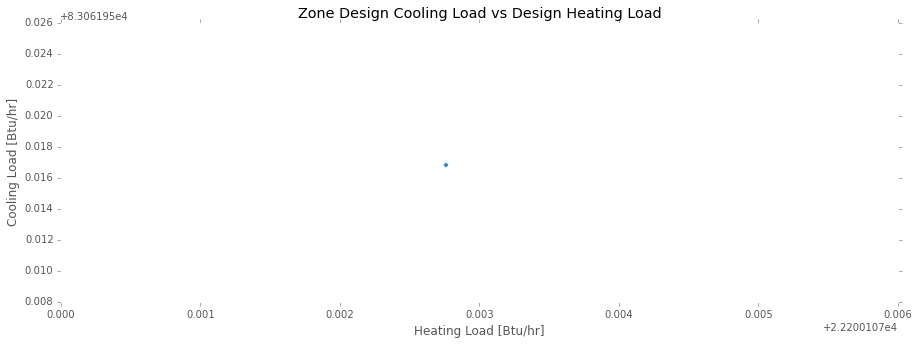

In [64]:
ax = zone_data.plot(kind='scatter', x='Design Heating Load', y='Design Cooling Load', figsize=(15, 5));
ax.set_title('Zone Design Cooling Load vs Design Heating Load')
ax.set_ylabel('Cooling Load [Btu/hr]')
ax.set_xlabel('Heating Load [Btu/hr]')

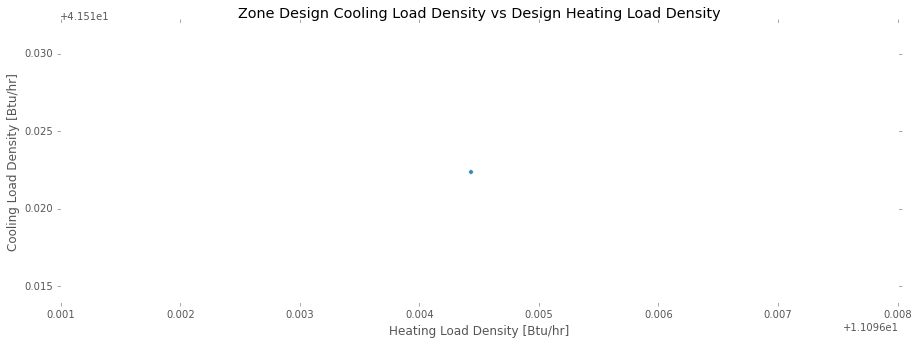

In [65]:
ax = zone_data.plot(kind='scatter', x='Design Heating Load Density', y='Design Cooling Load Density', figsize=(15, 5));
ax.set_title('Zone Design Cooling Load Density vs Design Heating Load Density')
ax.set_ylabel('Cooling Load Density [Btu/hr]')
ax.set_xlabel('Heating Load Density [Btu/hr]')

Zone Cooling Load Density Threshold
---

In [66]:
threshold = 50 #Btu/ft2
zone_cooling_threshold = zone_data[zone_data['Design Cooling Load Density'] > threshold]
zone_cooling_threshold = zone_cooling_threshold.sort(['Design Cooling Load Density'], ascending=[0])

print 'Design cooling threshold: ' + str(threshold) + ' Btu/hr-ft2'
print 'Number of zones above design cooling threshold: ' + str(zone_cooling_threshold['Design Cooling Load Density'].count())
zone_cooling_threshold

Design cooling threshold: 50 Btu/hr-ft2
Number of zones above design cooling threshold: 0


,FloorArea,Design Cooling Load,Design Heating Load,Design Cooling Load Density,Design Heating Load Density
Name,,,,,


Zone Heating Load Density Threshold
---

In [67]:
threshold = 50 #Btu/ft2
zone_heating_threshold = zone_data[zone_data['Design Heating Load Density'] > threshold]
zone_heating_threshold = zone_heating_threshold.sort(['Design Heating Load Density'], ascending=[0])

print 'Design heating threshold: ' + str(threshold) + ' Btu/hr-ft2'
print 'Number of zones above design heating threshold: ' + str(zone_heating_threshold['Design Heating Load Density'].count())
zone_heating_threshold

Design heating threshold: 50 Btu/hr-ft2
Number of zones above design heating threshold: 0


,FloorArea,Design Cooling Load,Design Heating Load,Design Cooling Load Density,Design Heating Load Density
Name,,,,,


Air System Sizing
===

AHU Names
---

In [68]:
ahu_sizing = pd.DataFrame()
ahu_hourly = pd.DataFrame()

In [69]:
report_name = 'HVACSizingSummary'
report_for_string = 'Entire Facility'
table_name = 'System Design Air Flow Rates'
column_name = 'Calculated cooling'

sql_query = 'select RowName from TabularDataWithStrings WHERE ReportName=\'' + report_name + '\''
sql_query += ' and ReportForString=\'' + report_for_string + '\''
sql_query += ' and TableName=\'' + table_name + '\''
sql_query += ' and ColumnName=\'' + column_name + '\''
sql_query += ';'

df = pd.read_sql_query(sql_query, con)
ahu_sizing['Name'] = df

AHU Sizing
---

In [70]:
#Calculated cooling [m3/s]	User cooling [m3/s]	Calculated heating [m3/s]	User heating [m3/s]

queries = [
    ['HVACSizingSummary', 'System Design Air Flow Rates', 'User cooling', 'Cooling Design Air Flow Rate', 2118.88],
    ['SystemSummary', 'Economizer', 'Minimum Outdoor Air', 'Design Minimum Outdoor Air Flow Rate', 2118.88],
    ['SystemSummary', 'Economizer', 'Maximum Outdoor Air', 'Design Maximum Outdoor Air Flow Rate', 2118.88]
]

for query in queries:
    sql_query = 'select Value from TabularDataWithStrings WHERE ReportName=\'' + query[0] + '\''
    sql_query += ' and TableName=\'' + query[1] + '\''
    sql_query += ' and ColumnName=\'' + query[2] + '\';'
    df = pd.read_sql_query(sql_query, con)
    ahu_sizing[query[3]] = df['Value'].convert_objects(convert_numeric=True)
    
    # Check if series has values and convert units
    if isinstance(ahu_sizing.loc[0][query[3]], float):
        ahu_sizing[query[3]] = ahu_sizing[query[3]]*query[4]

In [71]:
ahu_sizing.index = ahu_sizing['Name']
del ahu_sizing['Name']
#print ahu_sizing

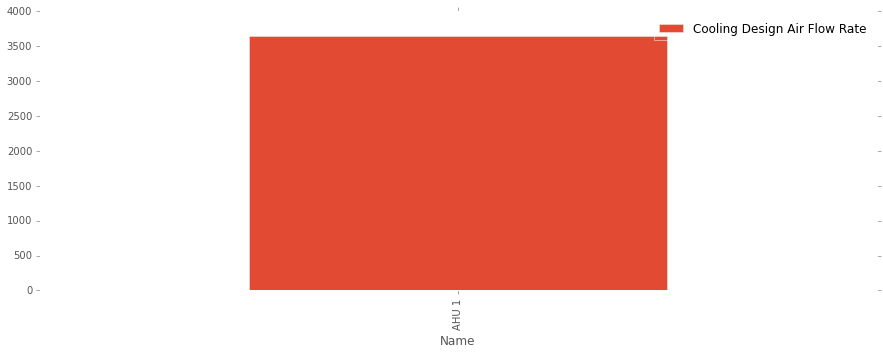

In [72]:
ahu_sizing.plot(kind='bar', figsize=(15, 5))

Hourly Simulation Results
---

In [84]:
#KeyValue = 'SUPPORT AHU'
Variables = [
    #['System Node Standard Density Volume Flow Rate', 'Air System Mixed Air Volume Flow Rate', 2118.88],
    #['Air System Mixed Air Mass Flow Rate', 'Air System Outdoor Air Volume Flow Rate', 2118.88],
    ['Air System Mixed Air Mass Flow Rate', 'Air System Mixed Air Volume Flow Rate', 7936.64144/0.075/60],
    ['Air System Outdoor Air Flow Fraction', 'Air System Outdoor Air Flow Fraction', 1],
    ['Air System Outdoor Air Mass Flow Rate', 'Air System Outdoor Air Volume Flow Rate', 7936.64144/0.075/60]
]

KeyValues = list(ahu_sizing.index)
print KeyValues

#KeyValues += ['SUPPORT AHU OUTDOOR AIR NODE']
#print KeyValues

for i, Variable in enumerate(Variables):
    VariableName = Variable[0]
    OutputName = Variable[1]
    unit_conversion = Variable[2]
    min_val = []
    max_val = []
    index = []
    for KeyValue in KeyValues:
        sql_query = "SELECT * FROM ReportVariableDataDictionary"
        sql_query += " WHERE "
        sql_query += "KeyValue=\'" + KeyValue + "'"
        sql_query += " AND "
        sql_query += "VariableName=\'" + VariableName + "'"
        sql_query += ";"

        df = pd.read_sql_query(sql_query, con)
        ReportVariableDataDictionaryIndex = str(df['ReportVariableDataDictionaryIndex'][0])

        sql_query = "SELECT * FROM ReportVariableData"
        sql_query += " WHERE "
        sql_query += "ReportVariableDataDictionaryIndex=\'" + ReportVariableDataDictionaryIndex + "'"
        sql_query += ";"

        df = pd.read_sql_query(sql_query, con)
        #ReportVariableData = df['VariableValue']
        #ReportVariableData.plot()

        ahu_hourly[KeyValue + ' ' + OutputName] = df['VariableValue']*unit_conversion
        
        index.append(KeyValue)
        min_val.append(df['VariableValue'].min()*unit_conversion)
        max_val.append(df['VariableValue'].max()*unit_conversion)

    ahu_sizing['Minimum ' + OutputName] = pd.Series(min_val, index)
    ahu_sizing['Maximum ' + OutputName] = pd.Series(max_val, index)

[u'AHU 1']


In [85]:
ahu_sizing

,Cooling Design Air Flow Rate,Design Minimum Outdoor Air Flow Rate,Design Maximum Outdoor Air Flow Rate,Minimum Air System Mixed Air Volume Flow Rate,Maximum Air System Mixed Air Volume Flow Rate,Minimum Air System Outdoor Air Flow Fraction,Maximum Air System Outdoor Air Flow Fraction,Minimum Air System Outdoor Air Volume Flow Rate,Maximum Air System Outdoor Air Volume Flow Rate
Name,,,,,,,,,
AHU 1,3644.4736,,,3610.154858,3610.154858,0.182452,0.182452,658.679171,658.679171


In [86]:
print 'AHU Minimum Outdoor Air Fraction'
print '----------------------------------'
for ahu in ahu_sizing.index:
    print ahu + ': ' + str(ahu_sizing['Minimum Air System Outdoor Air Flow Fraction'][ahu])

AHU Minimum Outdoor Air Fraction
----------------------------------
AHU 1: 0.182451777526


In [87]:
print 'AHU Maximum Design Supply Air Flow Rate'
print '----------------------------------'
for ahu in ahu_sizing.index:
    print ahu + ': ' + str(ahu_sizing['Cooling Design Air Flow Rate'][ahu])

AHU Maximum Design Supply Air Flow Rate
----------------------------------
AHU 1: 3644.4736


In [88]:
print 'AHU Maximum Simulation Supply Air Flow Rate'
print '----------------------------------'
for ahu in ahu_sizing.index:
    print ahu + ': ' + str(ahu_sizing['Maximum Air System Mixed Air Volume Flow Rate'][ahu])

AHU Maximum Simulation Supply Air Flow Rate
----------------------------------
AHU 1: 3610.15485751


Plots
---

AHU 1 Air System Mixed Air Volume Flow Rate
AHU 1 Air System Outdoor Air Volume Flow Rate
Minimum Supply Air Flow Rate: 3610.15485751 cfm
Minimum Outdoor Air Flow Rate: 658.679170896 cfm


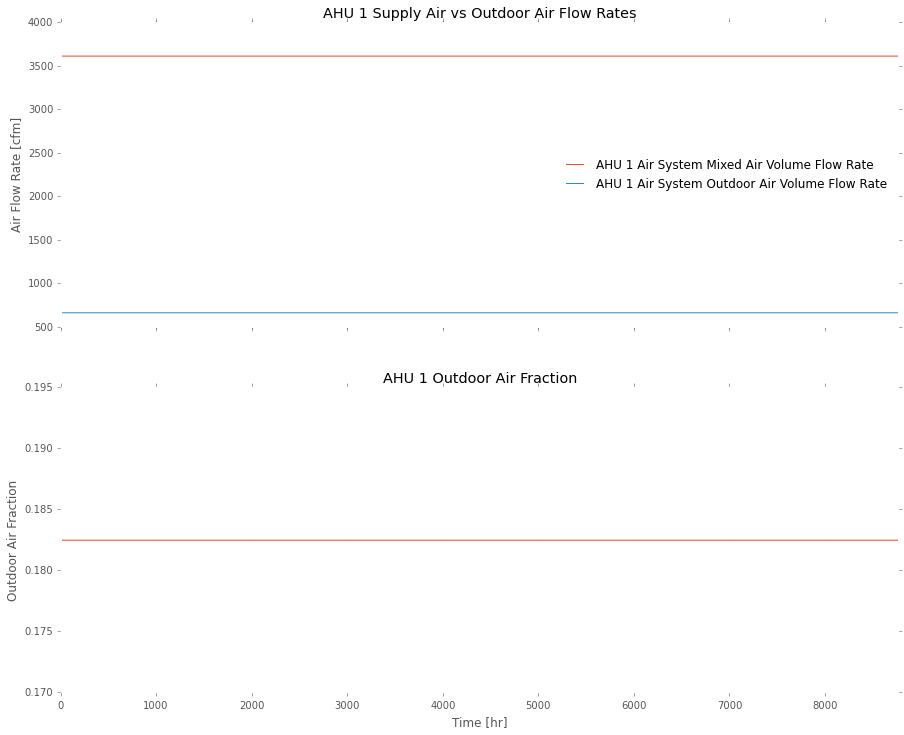

In [89]:
df = pd.DataFrame()

ahu_name = ahu_sizing.index[0].upper()
sa_name = ahu_name + ' Air System Mixed Air Volume Flow Rate'
oa_name = ahu_name + ' Air System Outdoor Air Volume Flow Rate'

print sa_name
print oa_name

df[sa_name] = ahu_hourly[sa_name]
df[oa_name] = ahu_hourly[oa_name]
oa_frac = df[oa_name] / df[sa_name]

print 'Minimum Supply Air Flow Rate: ' + str(df[sa_name].min()) + ' cfm'
print 'Minimum Outdoor Air Flow Rate: ' + str(df[oa_name].min()) + ' cfm'

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
#plt.ylabel('Heating Rate [MBH]')

df.plot(ax=axes[0]); axes[0].set_title(ahu_name + ' Supply Air vs Outdoor Air Flow Rates'); 
#ax.set_title('Supply Air vs Outdoor Air Flow Rates')
axes[0].set_ylabel('Air Flow Rate [cfm]')

df = pd.DataFrame()

oa_frac.plot(ax=axes[1]); axes[1].set_title(ahu_name + ' Outdoor Air Fraction'); 
#ax.set_title('Supply Air vs Outdoor Air Flow Rates')
axes[1].set_ylabel('Outdoor Air Fraction')
axes[1].set_xlabel('Time [hr]')

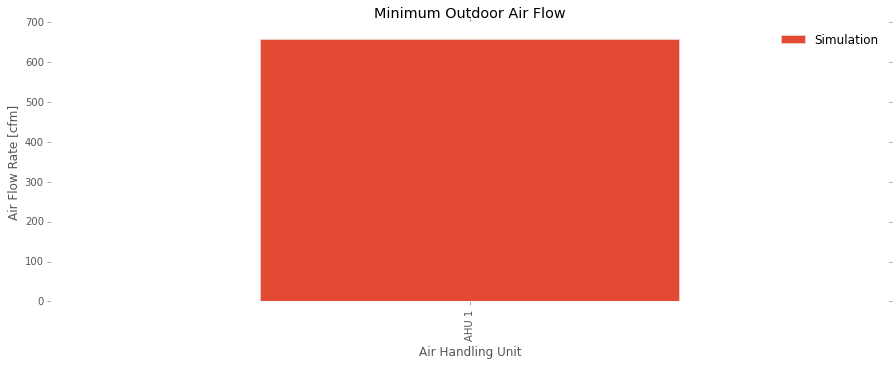

In [90]:
df = pd.DataFrame({'Design': ahu_sizing['Design Minimum Outdoor Air Flow Rate'], 
                   'Simulation': ahu_sizing['Minimum Air System Outdoor Air Volume Flow Rate']})
ax = df.plot(kind='bar', figsize=(15, 5))
ax.set_title('Minimum Outdoor Air Flow')

ax.set_xlabel("Air Handling Unit")
ax.set_ylabel("Air Flow Rate [cfm]")

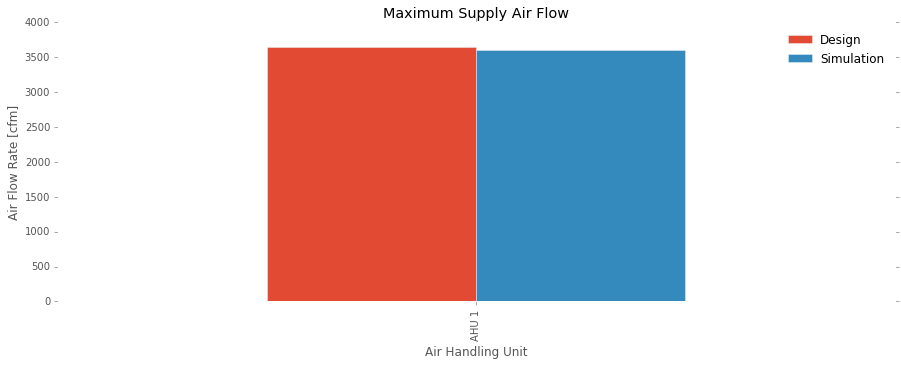

In [91]:
df = pd.DataFrame({'Design': ahu_sizing['Cooling Design Air Flow Rate'], 
                   'Simulation': ahu_sizing['Maximum Air System Mixed Air Volume Flow Rate']})
ax = df.plot(kind='bar', figsize=(15, 5))
ax.set_title('Maximum Supply Air Flow')

ax.set_xlabel("Air Handling Unit")
ax.set_ylabel("Air Flow Rate [cfm]")

Total Air Flow
---

In [92]:
model_val = ahu_sizing['Cooling Design Air Flow Rate'].sum()
sim_val = ahu_sizing['Maximum Air System Mixed Air Volume Flow Rate'].sum()
aei_val = ahu_sizing['AEI Cooling Design Air Flow Rate'].sum()
per_diff = (model_val - aei_val) / (aei_val)*100.0

print '--------------'
print 'Total'
print '--------------'
print 'Design    : ' + str(model_val) + ' CFM'
print 'Simulation: ' + str(sim_val) + ' CFM'
print 'AEI       : ' + str(aei_val) + ' CFM'
print 'Per Diff  : ' + str(per_diff) + '%'

KeyError: 'AEI Cooling Design Air Flow Rate'

Heating Coils
===

In [ ]:
heating_coil_sizing = pd.DataFrame()
heating_coil_hourly = pd.DataFrame()

In [ ]:
report_name = 'EquipmentSummary'
report_for_string = 'Entire Facility'
table_name = 'Heating Coils'
column_name = 'Design Coil Load'

sql_query = 'select RowName from TabularDataWithStrings WHERE ReportName=\'' + report_name + '\''
sql_query += ' and ReportForString=\'' + report_for_string + '\''
sql_query += ' and TableName=\'' + table_name + '\''
sql_query += ' and ColumnName=\'' + column_name + '\''
sql_query += ';'

df = pd.read_sql_query(sql_query, con)
heating_coil_sizing['Name'] = df
heating_coil_sizing.index = heating_coil_sizing['Name']
del heating_coil_sizing['Name']

In [ ]:
queries = [
    ['EquipmentSummary', 'Heating Coils', 'Design Coil Load', 'Design Coil Load', 3.412], 
]

for query in queries:
    sql_query = 'select Value from TabularDataWithStrings WHERE ReportName=\'' + query[0] + '\''
    sql_query += ' and TableName=\'' + query[1] + '\''
    sql_query += ' and ColumnName=\'' + query[2] + '\';'

    df = pd.read_sql_query(sql_query, con)
    df['Name'] = pd.read_sql_query(sql_query.replace('Value', 'RowName'), con)
    df.index = df['Name']
    heating_coil_sizing[query[3]] = df['Value'].convert_objects(convert_numeric=True)*query[4]

In [ ]:
heating_coil_sizing.head()

In [ ]:
#KeyValue = 'SUPPORT AHU'
Variables = [
    ['Heating Coil Heating Rate', 'Heating Coil Heating Rate', 1/3.412],
]

KeyValues = list(heating_coil_sizing.index)

for i, Variable in enumerate(Variables):
    VariableName = Variable[0]
    OutputName = Variable[1]
    unit_conversion = Variable[2]
    min_val = []
    max_val = []
    index = []
    for KeyValue in KeyValues:
        sql_query = "SELECT * FROM ReportVariableDataDictionary"
        sql_query += " WHERE "
        sql_query += "KeyValue=\'" + KeyValue + "'"
        sql_query += " AND "
        sql_query += "VariableName=\'" + VariableName + "'"
        sql_query += ";"

        df = pd.read_sql_query(sql_query, con)
        ReportVariableDataDictionaryIndex = str(df['ReportVariableDataDictionaryIndex'][0])

        sql_query = "SELECT * FROM ReportVariableData"
        sql_query += " WHERE "
        sql_query += "ReportVariableDataDictionaryIndex=\'" + ReportVariableDataDictionaryIndex + "'"
        sql_query += ";"

        df = pd.read_sql_query(sql_query, con)
        #ReportVariableData = df['VariableValue']
        #ReportVariableData.plot()

        heating_coil_hourly[KeyValue + ' ' + OutputName] = df['VariableValue']*unit_conversion
        
        index.append(KeyValue)
        min_val.append(df['VariableValue'].min()*unit_conversion)
        max_val.append(df['VariableValue'].max()*unit_conversion)

    heating_coil_sizing['Minimum ' + OutputName] = pd.Series(min_val, index)
    heating_coil_sizing['Maximum ' + OutputName] = pd.Series(max_val, index)

In [ ]:
df = pd.DataFrame({'Design': heating_coil_sizing['Design Coil Load'], 
                   'Simulation': heating_coil_sizing['Maximum Heating Coil Heating Rate']})
ax = df.plot(kind='bar', figsize=(15, 5))
ax.set_title('Maximum Heating Coil Load')

ax.set_xlabel("Heating Coil")
ax.set_ylabel("Load [Btu/hr]")

In [ ]:
threshold = 10**6 #Btu/hr
load_threshold = heating_coil_sizing[heating_coil_sizing['Design Coil Load'] > threshold]
load_threshold = load_threshold.sort(['Design Coil Load'], ascending=[0])

print 'Threshold: ' + str(threshold) + ' Btu/hr'
print 'Number of coils above threshold: ' + str(load_threshold['Design Coil Load'].count())
print load_threshold

In [ ]:
zone_data.loc['THERMAL ZONE: L5-EXAM-9']
print zone_data.loc['THERMAL ZONE: L5-EXAM-9']['Design Cooling Load']/1.085/(75-57)


Close Database Connection
===

In [ ]:
con.close()

In [ ]:
"""
report_name = 'HVACSizingSummary'
report_for_string = 'Entire Facility'
table_name = 'Zone Cooling'
column_name = 'Calculated Design Load'

for row_name in list(zone_data['Name']):
    sql_query = 'select Value from TabularDataWithStrings WHERE ReportName=\'' + report_name + '\''
    sql_query += ' and ReportForString=\'' + report_for_string + '\''
    sql_query += ' and TableName=\'' + table_name + '\''
    sql_query += ' and ColumnName=\'' + column_name + '\''
    sql_query += ' and RowName=\'' + row_name + '\''
    sql_query += ';'
    df = pd.read_sql_query(sql_query, con)
    print df.head()
"""